<a href="https://colab.research.google.com/github/web1havv/ml_models/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
car_dataset=pd.read_csv("/content/car data.csv")

In [3]:
car_dataset.shape

(301, 9)

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_dataset.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [6]:
car_dataset.replace({'Fuel_Type':{'Diesel':0,'Petrol':1,'CNG':3}},inplace=True)

In [7]:

car_dataset.Transmission.value_counts()



Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [8]:
car_dataset.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [11]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,0,0,0
1,sx4,2013,4.75,9.54,43000,0,0,0,0
2,ciaz,2017,7.25,9.85,6900,1,0,0,0
3,wagon r,2011,2.85,4.15,5200,1,0,0,0
4,swift,2014,4.60,6.87,42450,0,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0,0,0
297,brio,2015,4.00,5.90,60000,1,0,0,0
298,city,2009,3.35,11.00,87934,1,0,0,0
299,city,2017,11.50,12.50,9000,0,0,0,0


In [12]:
car_dataset.drop('Car_Name',axis=1,inplace=True)

In [13]:
car_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,1,0,0,0
1,2013,4.75,9.54,43000,0,0,0,0
2,2017,7.25,9.85,6900,1,0,0,0
3,2011,2.85,4.15,5200,1,0,0,0
4,2014,4.60,6.87,42450,0,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0
297,2015,4.00,5.90,60000,1,0,0,0
298,2009,3.35,11.00,87934,1,0,0,0
299,2017,11.50,12.50,9000,0,0,0,0


In [14]:
X=car_dataset.drop("Selling_Price",axis=1)

In [15]:
Y=car_dataset['Selling_Price']

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
np.random.seed(10^1985965)

In [18]:
model=LinearRegression()

In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
lin_predict_xtrain=model.predict(X_train)

In [21]:
metrics.r2_score(Y_train,lin_predict_xtrain)

0.8977113795707405

Text(0.5, 1.0, 'Actual price Vs Predicted Price')

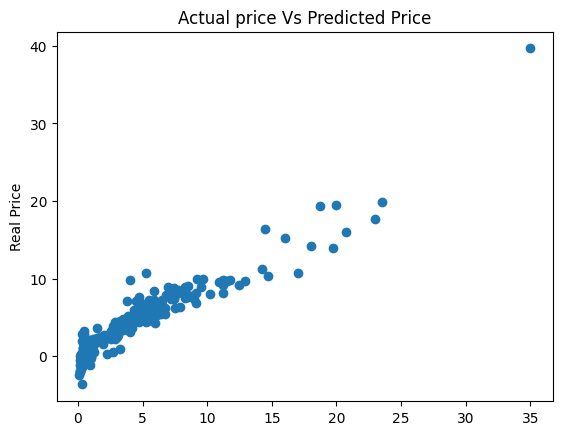

In [22]:
plt.scatter(Y_train,lin_predict_xtrain)
plt.xlabel=("actual Price")
plt.ylabel("Real Price")
plt.title("Actual price Vs Predicted Price")


In [23]:
 lasso_model=Lasso()

In [24]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [26]:
predict_las_X_train=lasso_model.predict(X_train)

In [28]:
metrics.r2_score(Y_train,predict_las_X_train)

0.8558909575730127

Text(0.5, 1.0, 'Actual price Vs Predicted Price')

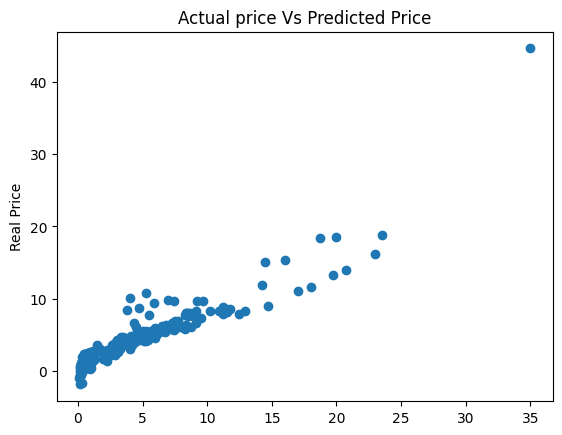

In [30]:
plt.scatter(Y_train,predict_las_X_train)
plt.xlabel=("actual Price")
plt.ylabel("Real Price")
plt.title("Actual price Vs Predicted Price")
